In [1]:
#import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix

In [10]:
df = pd.read_csv('data/Titanic_Cleaned.csv')
df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,1,0.0,3,1,0,False,0,0,True,False,True,False,True,False,False
1,2,1.0,1,1,0,True,3,3,False,False,False,False,False,True,False
2,3,1.0,3,0,0,False,1,1,False,False,True,True,False,False,False
3,4,1.0,1,1,0,True,2,3,False,False,True,False,False,True,False
4,5,0.0,3,0,0,False,2,1,True,False,True,False,True,False,False


In [12]:
df_test = df[df['Survived'].isna()]



In [13]:
df_train = df.dropna(subset=['Survived'])



In [14]:


df_train.to_csv('df_train.csv', index=False)
df_test.to_csv('df_test.csv', index=False)


In [17]:


print(f"Training set shape:{df_train.shape}")
print(f"Test set shape: {df_test.shape}")

Training set shape:(891, 15)
Test set shape: {df_test.shape}


In [18]:
df['TravelAlone'] = np.where((df['SibSp'] == 0) & (df['Parch'] == 0), 1, 0)
df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique,TravelAlone
0,1,0.0,3,1,0,False,0,0,True,False,True,False,True,False,False,0
1,2,1.0,1,1,0,True,3,3,False,False,False,False,False,True,False,0
2,3,1.0,3,0,0,False,1,1,False,False,True,True,False,False,False,1
3,4,1.0,1,1,0,True,2,3,False,False,True,False,False,True,False,0
4,5,0.0,3,0,0,False,2,1,True,False,True,False,True,False,False,1


In [32]:
df_train['TravelAlone'] = np.where((df_train['SibSp'] + df_train['Parch']) > 0, 0, 1)

In [37]:
if 'TravelAlone' in df_train.columns:
    df_train[['SibSp', 'Parch', 'TravelAlone']].head()
else:
    print("The 'TravelAlone' column does not exist in the dataframe.")


In [39]:
df_train.drop('SibSp', axis=1, inplace=True) # Drop SibSp column as it is no longer needed
df_train.drop('Parch', axis=1, inplace=True)

In [40]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'HasCabin', 'CatAge', 'CatFare',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Unique', 'TravelAlone'],
      dtype='object')

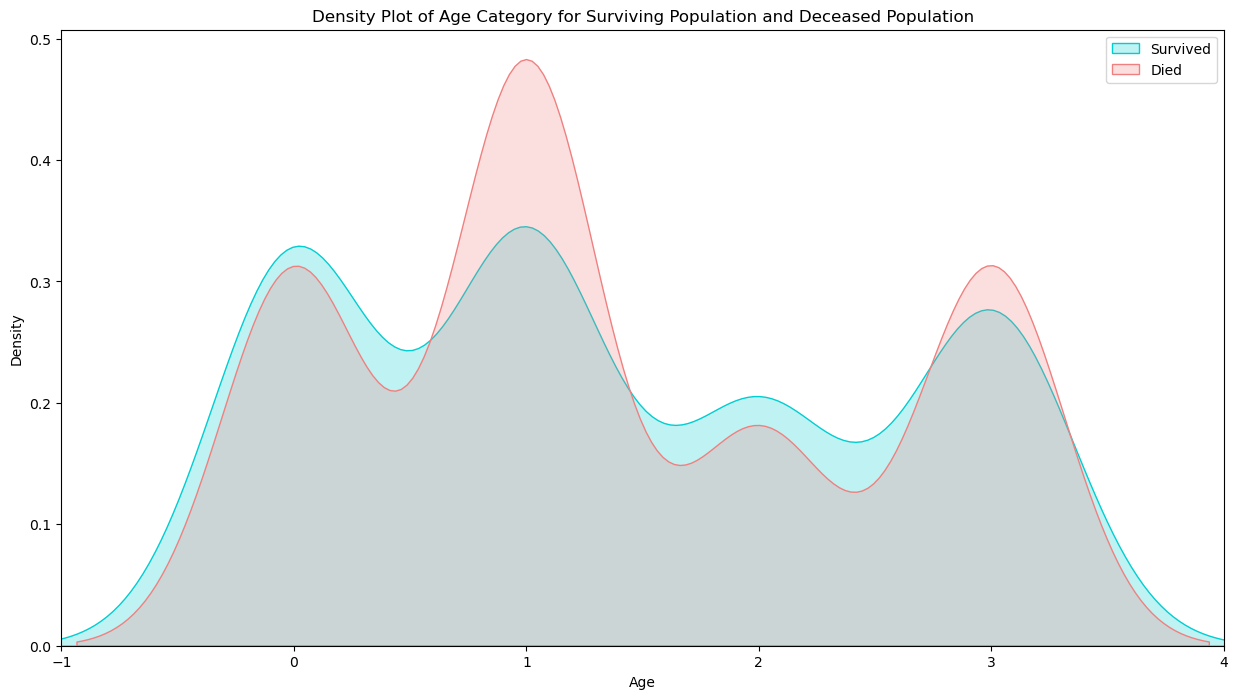

In [41]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["CatAge"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["CatAge"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age Category for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-1,4)
plt.show()

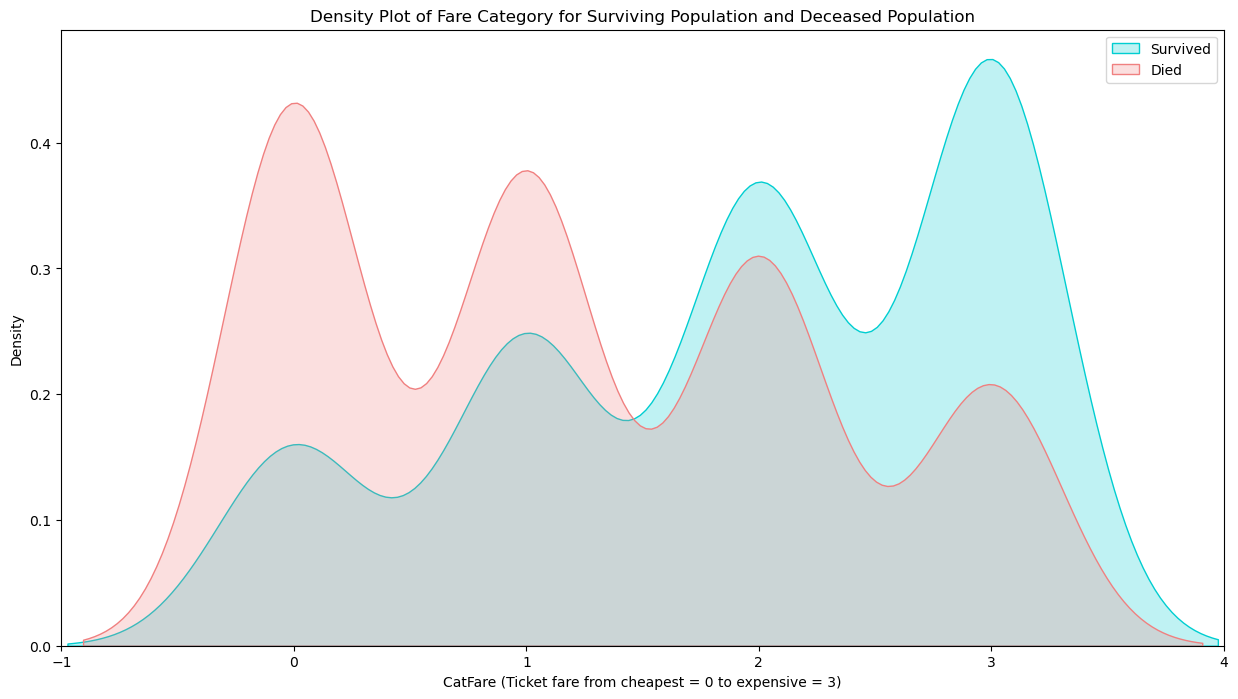

In [43]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["CatFare"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["CatFare"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare Category for Surviving Population and Deceased Population')
ax.set(xlabel='CatFare (Ticket fare from cheapest = 0 to expensive = 3)')
plt.xlim(-1,4)
plt.show()

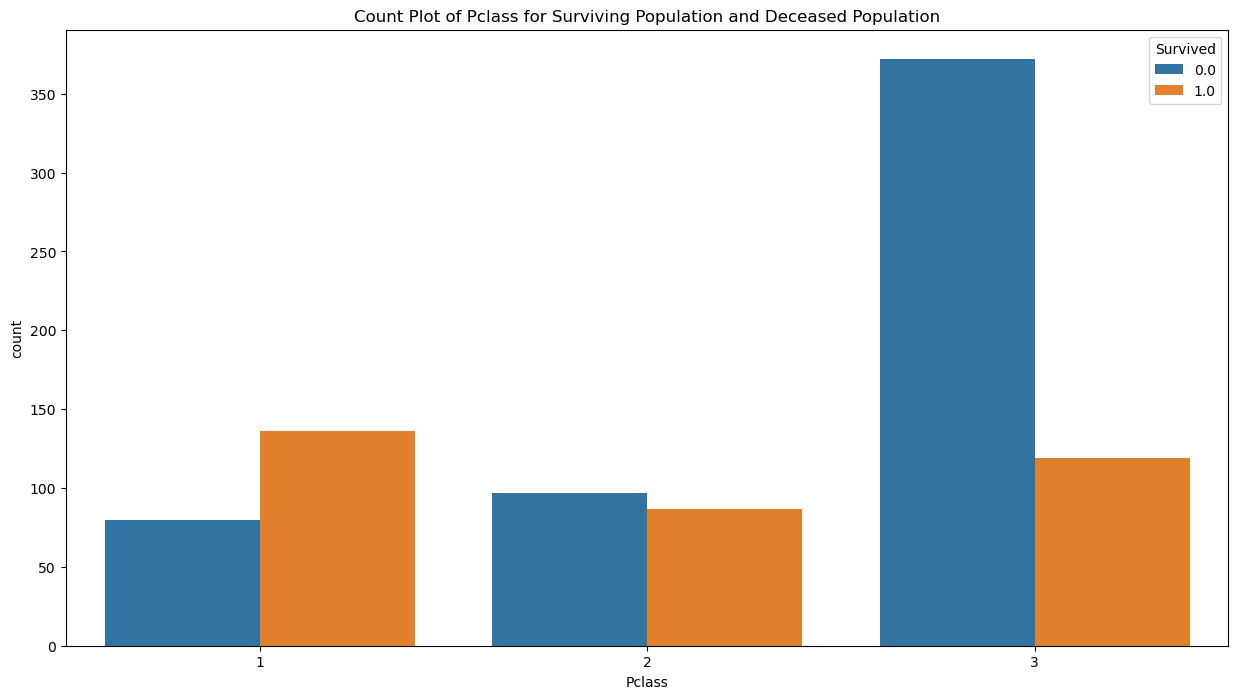

In [44]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="Pclass", hue="Survived", data=df_train)
plt.title('Count Plot of Pclass for Surviving Population and Deceased Population')
ax.set(xlabel='Pclass')
plt.show()

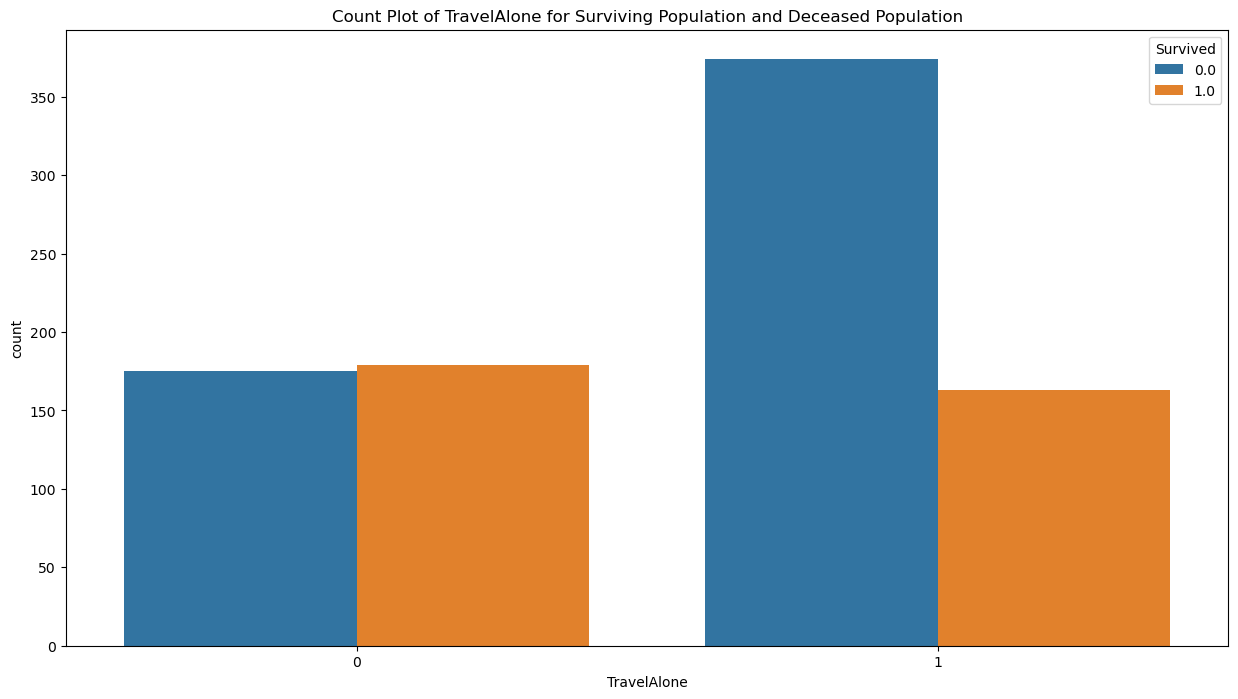

In [45]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="TravelAlone", hue="Survived", data=df_train)
plt.title('Count Plot of TravelAlone for Surviving Population and Deceased Population')
ax.set(xlabel='TravelAlone')
plt.show()

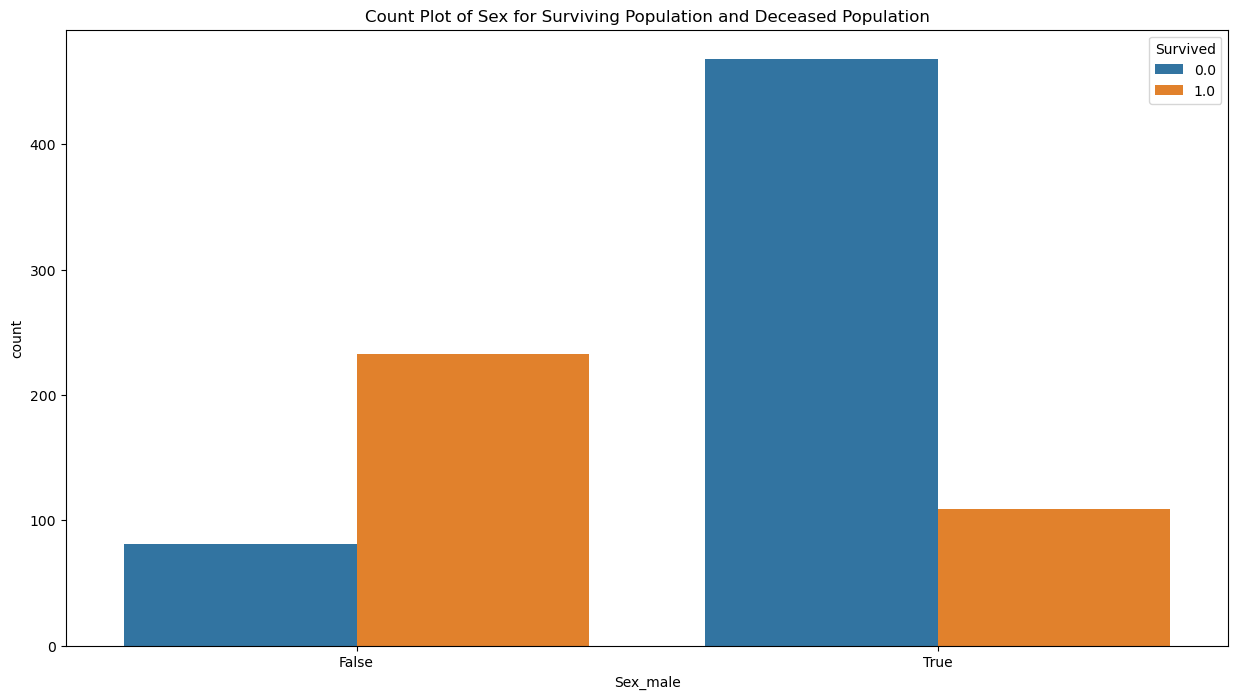

In [47]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="Sex_male", hue="Survived", data=df_train)
plt.title('Count Plot of Sex for Surviving Population and Deceased Population')
ax.set(xlabel='Sex_male')
plt.show()

In [48]:
correlation_matrix = df_train.corr()

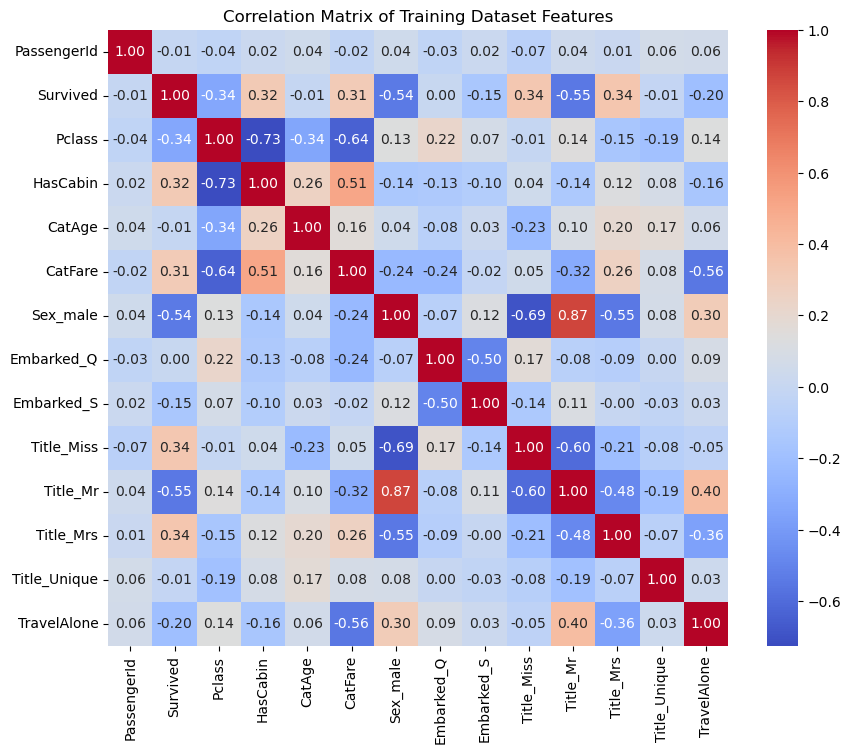

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Training Dataset Features')
plt.show()

In [50]:
#prepare the data
X = df_train.drop(['PassengerId', 'Survived'], axis=1)
y = df_train['Survived']

In [51]:
#initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

log_reg = LogisticRegression()

In [52]:
#perform RFE to selevt a subset of features
rfe = RFE(log_reg, n_features_to_select=5)
rfe.fit(X, y)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [53]:
#list the selected features
selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features)

Selected features: Index(['Pclass', 'HasCabin', 'Sex_male', 'Title_Mr', 'Title_Unique'], dtype='object')


In [54]:
#split the data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

In [55]:
#train the logistic regression model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [56]:
#make predicitons using the test set
y_pred = log_reg.predict(X_test)

In [57]:
#evaluate the model
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[88 17]
 [19 55]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83       105
         1.0       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [58]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7988826815642458


In [59]:
from sklearn.metrics import log_loss

y_pred_probability = log_reg.predict_proba(X_test)[:, 1]
log_loss_value = log_loss(y_test, y_pred_probability)
print("Log Loss:", log_loss_value)

Log Loss: 0.4176511316036942


In [60]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred_probability)
print("AUC:", auc)

AUC: 0.8783140283140285


In [64]:
from sklearn.model_selection import cross_val_score

scores_accuracy = cross_val_score(log_reg, X[selected_features], y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(log_reg, X[selected_features], y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(log_reg, X[selected_features], y, cv=10, scoring='roc_auc')

print("Mean Accuracy:", scores_accuracy.mean())
print("Mean Log Loss:", -scores_log_loss.mean())
print("Mean AUC:", scores_auc.mean())

Mean Accuracy: 0.80019975031211
Mean Log Loss: 0.4431437188636189
Mean AUC: 0.8560172028407322
